In this notebook, we provide code for computing persistence diagrams for each point of a 3D shape using the sublevel sets of the geodesic distance functions to the point. More formally, if $x$ is a point on the 3D shape $S$, let $D(x) = \text{Dgm}(f_x)$, where $f_x:y\in S\mapsto d_S(x,y)$ and $d_S(\cdot,\cdot)$ is the geodesic distance on $S$. Then $D(x)$ can be used as a powerful descriptor for $x$ which enjoys many desireable properties, such as stability and invariance to solid transformations of the shape. See [this article](https://diglib.eg.org/handle/10.1111/cgf12692) for more details.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# perslocsig is a python package obtained by compiling the C++ and Cython code associated to this notebook
from perslocsig import compute_geodesic_persistence_diagrams as gpd

The function `compute_geodesic_persistence_diagrams` takes two arguments:

1. the name of the .off file containing the 3D shape
2. a list of integers containing the points for which persistence diagrams will be computed

The function first computes the lengths of all edges in the shape triangulation. Next it computes the geodesic distances using the Boost implementation of the Dijkstra algorithm. Finally, the persistence diagrams in dimension 1 are computed with a Union-Find data structure using symmetry between 0- and 1-dimensional homology. Note that there is actually no interesting homology in dimension > 1 (assuming that the shapes are homeomorphic to spheres).

Here, we compute the first 10 diagrams of shape `61.off`, which represents the following airplane: <img src="data/61.jpg">

In [4]:
D = gpd(b"data/61.off", np.arange(10))

Let us visualize the persistence diagrams. First, read the shape as a 3D point cloud (we do not need the triangulation for visualization).

In [5]:
X = np.loadtxt("data/61.txt")

The output of `compute_geodesic_persistence_diagrams` is a list of pairs of two arrays. One is the persistence diagram, and the other contains, for each point in the persistence diagram, the indices of the corresponding points on the 3D shape where holes in the geodesic balls were created or filled in. In the following cell, we define a point on the 3D shape with the `idx` variable, and we plot both its corresponding persistence diagram, and the generators of the diagram points on the shape. More precisely, we highlight the following points of the shape:

1. **black**:   base point given by `idx`, 
2. **red**:     points where geodesic balls were created,
3. **green**:   points where geodesic balls were filled in.

<IPython.core.display.Javascript object>


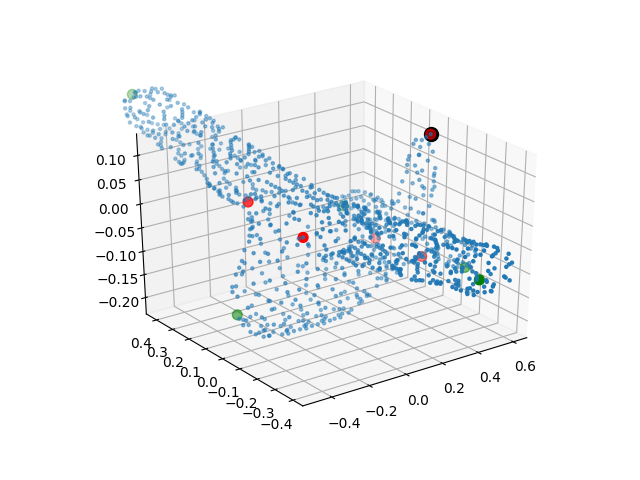

<IPython.core.display.Javascript object>


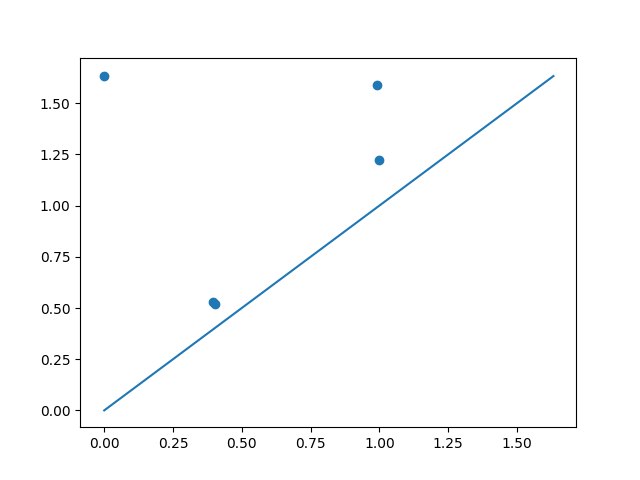

In [6]:
idx = 0
number_dgm_pts = 5

ibirth, ideath = np.array(D[idx][0])[:number_dgm_pts,1], np.array(D[idx][0])[:number_dgm_pts,0]
Dx,     Dy =     np.array(D[idx][1])[:number_dgm_pts,1], np.array(D[idx][1])[:number_dgm_pts,0]

%matplotlib notebook

fig = plt.figure()
shape = fig.gca(projection='3d')
shape.scatter(X[::5,0],    X[::5,1],    X[::5,2],    s=5)
shape.scatter(X[idx,0],    X[idx,1],    X[idx,2],    s=100, c="black")
shape.scatter(X[ibirth,0], X[ibirth,1], X[ibirth,2], s=50, c="red")
shape.scatter(X[ideath,0], X[ideath,1], X[ideath,2], s=50, c="green")
shape.axis("equal")
plt.show()

plt.figure()
plt.scatter(Dx,Dy)
plt.plot([min(Dx),max(Dy)],[min(Dx),max(Dy)])
plt.show()

One can see that the 3 most persistent points (i.e. the ones that are farthest from the diagonal) represent the two wings and the head of the airplane.